In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
from tensorflow.keras.callbacks import TensorBoard
import time
NAME = "SIEC-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [2]:
pd.set_option('display.max_columns',100)
Data = pd.read_excel("Otw4_mgr.xlsx")

In [3]:
Labeleddata = Data.dropna()

In [127]:
Labeleddata_withr8index = Labeleddata.reset_index(drop=True)#NAN DROP
test_row = Labeleddata_withr8index.iloc[5:7]#test rows 5,6
R8data= Labeleddata_withr8index.drop([5,6])# dropping 5 and 6 row in labeled data and creating R8data (31 elements)
R8data = R8data.reset_index(drop=True)# reseting index for R8data

TOC = R8data["TOC[%]"]#toc 31 elements

R8data = R8data.drop(columns=["H", "H (lab.)","TOC[%]"])# X parameters without H, H lab and TOC
TOC_row5=test_row["TOC[%]"] # TOC 2 elements
R8data

,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB
0,-0.0090,0.1515,0.0497,0.0006,0.0053,0.7863,0.0066,216.7687,74.6406,7.4101,7.6620,165.1193,158.5410,135.5706,0.259948,4.1251,11.2350,2.8859,2.6145
1,0.0050,0.2049,0.0003,0.0008,0.0047,0.7817,0.0076,217.3275,79.0469,7.1200,7.0996,165.1093,160.1189,140.0381,0.251399,4.6601,12.1027,2.6390,2.6029
2,0.0005,0.2205,0.0002,0.0007,0.0003,0.7713,0.0070,217.1293,78.3281,7.0894,6.8675,158.6258,152.0281,138.6958,0.244247,4.8669,11.2013,2.1004,2.6161
3,0.0147,0.0002,0.1756,0.0006,0.0054,0.8122,0.0060,217.6831,78.5469,6.8309,6.7372,166.9451,152.2988,132.8525,0.274207,4.3596,10.3574,3.3759,2.6362
4,0.0240,0.0580,0.1720,0.0006,0.0004,0.7572,0.0118,218.0057,78.1250,6.8198,6.6446,146.1019,147.7815,122.3833,0.259454,3.9793,10.7352,2.4160,2.6219
5,0.0284,0.0002,0.1853,0.0043,0.0002,0.8066,0.0034,218.0946,75.0000,6.4876,6.4249,153.6049,147.4606,130.3131,0.269534,4.2349,12.8276,2.5304,2.6637
6,0.0400,0.0002,0.1923,0.0209,0.0066,0.7760,0.0040,217.9218,76.9219,6.5600,6.4772,157.5808,151.8502,122.5860,0.262908,4.3174,9.8730,3.6045,2.6940
7,0.0277,0.0002,0.2369,0.0027,0.0002,0.7534,0.0066,218.1301,75.7344,6.6984,6.7055,146.4647,143.9991,123.9890,0.257037,4.5084,9.3845,2.3100,2.6546
8,0.0252,0.1213,0.0743,0.0006,0.0009,0.7977,0.0052,218.2063,77.7031,6.6485,6.5693,158.2258,154.9945,132.9086,0.258974,4.1333,12.9277,2.6823,2.6295
9,0.0322,0.1371,0.0286,0.0127,0.0002,0.8166,0.0048,218.6025,80.7812,6.5044,6.0663,158.1200,150.4424,140.0845,0.263478,4.6178,12.2241,1.8963,2.6732


In [6]:
x, y = R8data, TOC
print(x.shape)

(32, 19)


In [7]:
x = x.values.reshape(x.shape[0],x.shape[1],1)
print(x.shape)

(32, 19, 1)


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.16)


In [19]:
xtrain

[[[ 2.840000e-02]
  [ 2.000000e-04]
  [ 1.853000e-01]
  [ 4.300000e-03]
  [ 2.000000e-04]
  [ 8.066000e-01]
  [ 3.400000e-03]
  [ 2.180946e+02]
  [ 7.500000e+01]
  [ 6.487600e+00]
  [ 6.424900e+00]
  [ 1.536049e+02]
  [ 1.474606e+02]
  [ 1.303131e+02]
  [ 2.695340e-01]
  [ 4.234900e+00]
  [ 1.282760e+01]
  [ 2.530400e+00]
  [ 2.663700e+00]]

 [[ 6.700000e-03]
  [ 1.231000e-01]
  [ 2.000000e-04]
  [ 1.000000e-04]
  [ 1.280000e-02]
  [ 8.638000e-01]
  [ 0.000000e+00]
  [ 2.171065e+02]
  [ 8.570310e+01]
  [ 7.696200e+00]
  [ 8.719700e+00]
  [ 1.966340e+02]
  [ 1.920916e+02]
  [ 1.668110e+02]
  [ 2.712600e-01]
  [ 5.014300e+00]
  [ 1.266540e+01]
  [ 2.936800e+00]
  [ 2.587000e+00]]

 [[ 6.500000e-03]
  [ 1.000000e-04]
  [ 1.000000e-04]
  [ 1.000000e-04]
  [ 1.213000e-01]
  [ 8.782000e-01]
  [ 2.000000e-04]
  [ 2.173783e+02]
  [ 9.809380e+01]
  [ 2.129000e+01]
  [ 3.095480e+01]
  [ 3.280214e+02]
  [ 2.859020e+02]
  [ 1.745077e+02]
  [ 3.727080e-01]
  [ 4.566700e+00]
  [ 1.012340e+01]
  [ 1.

In [99]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(19,1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam",metrics=['accuracy'])
model.summary()
#model.fit(xtrain, ytrain, batch_size=12,epochs=20, verbose=0,validation_split=0.1,callbacks=[tensorboard])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 18, 32)            96        
_________________________________________________________________
flatten_15 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                36928     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 37,089
Trainable params: 37,089
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(xtrain, ytrain,batch_size = 64,epochs=2000,validation_split=0.2,callbacks =[tensorboard] )



Epoch 1/2000
1/1 [==============================] - 0s 445ms/step - loss: 0.4167 - accuracy: 0.0000e+00 - val_loss: 0.9060 - val_accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 1s 564ms/step - loss: 0.4165 - accuracy: 0.0000e+00 - val_loss: 0.9064 - val_accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.4163 - accuracy: 0.0000e+00 - val_loss: 0.9063 - val_accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.4160 - accuracy: 0.0000e+00 - val_loss: 0.9060 - val_accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.4157 - accuracy: 0.0000e+00 - val_loss: 0.9055 - val_accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.4156 - accuracy: 0.0000e+00 - val_loss: 0.9051 - val_accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 110ms/step - loss: 0.4154 - accuracy: 0.0000e+00 

1/1 [==============================] - 0s 59ms/step - loss: 0.4038 - accuracy: 0.0000e+00 - val_loss: 0.9005 - val_accuracy: 0.0000e+00
Epoch 56/2000
1/1 [==============================] - 0s 116ms/step - loss: 0.4036 - accuracy: 0.0000e+00 - val_loss: 0.9000 - val_accuracy: 0.0000e+00
Epoch 57/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.4034 - accuracy: 0.0000e+00 - val_loss: 0.8997 - val_accuracy: 0.0000e+00
Epoch 58/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.4032 - accuracy: 0.0000e+00 - val_loss: 0.9002 - val_accuracy: 0.0000e+00
Epoch 59/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.4029 - accuracy: 0.0000e+00 - val_loss: 0.9005 - val_accuracy: 0.0000e+00
Epoch 60/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.4027 - accuracy: 0.0000e+00 - val_loss: 0.9005 - val_accuracy: 0.0000e+00
Epoch 61/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.4024 - accuracy: 0.0000e+00 - val_los

1/1 [==============================] - 0s 91ms/step - loss: 0.3910 - accuracy: 0.0000e+00 - val_loss: 0.8949 - val_accuracy: 0.0000e+00
Epoch 110/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.3908 - accuracy: 0.0000e+00 - val_loss: 0.8942 - val_accuracy: 0.0000e+00
Epoch 111/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.3905 - accuracy: 0.0000e+00 - val_loss: 0.8940 - val_accuracy: 0.0000e+00
Epoch 112/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.3903 - accuracy: 0.0000e+00 - val_loss: 0.8940 - val_accuracy: 0.0000e+00
Epoch 113/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.3900 - accuracy: 0.0000e+00 - val_loss: 0.8941 - val_accuracy: 0.0000e+00
Epoch 114/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.3897 - accuracy: 0.0000e+00 - val_loss: 0.8943 - val_accuracy: 0.0000e+00
Epoch 115/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.3895 - accuracy: 0.0000e+00 - va

Epoch 163/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.3779 - accuracy: 0.0000e+00 - val_loss: 0.8863 - val_accuracy: 0.0000e+00
Epoch 164/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.3777 - accuracy: 0.0000e+00 - val_loss: 0.8868 - val_accuracy: 0.0000e+00
Epoch 165/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.3775 - accuracy: 0.0000e+00 - val_loss: 0.8872 - val_accuracy: 0.0000e+00
Epoch 166/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.3772 - accuracy: 0.0000e+00 - val_loss: 0.8871 - val_accuracy: 0.0000e+00
Epoch 167/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.3769 - accuracy: 0.0000e+00 - val_loss: 0.8865 - val_accuracy: 0.0000e+00
Epoch 168/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.3768 - accuracy: 0.0000e+00 - val_loss: 0.8857 - val_accuracy: 0.0000e+00
Epoch 169/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.3765 - accuracy: 

1/1 [==============================] - 0s 114ms/step - loss: 0.3644 - accuracy: 0.0000e+00 - val_loss: 0.8773 - val_accuracy: 0.0000e+00
Epoch 218/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.3640 - accuracy: 0.0000e+00 - val_loss: 0.8775 - val_accuracy: 0.0000e+00
Epoch 219/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.3638 - accuracy: 0.0000e+00 - val_loss: 0.8782 - val_accuracy: 0.0000e+00
Epoch 220/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.3636 - accuracy: 0.0000e+00 - val_loss: 0.8783 - val_accuracy: 0.0000e+00
Epoch 221/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.3634 - accuracy: 0.0000e+00 - val_loss: 0.8780 - val_accuracy: 0.0000e+00
Epoch 222/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.3632 - accuracy: 0.0000e+00 - val_loss: 0.8772 - val_accuracy: 0.0000e+00
Epoch 223/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.3629 - accuracy: 0.0000e+00 - v

1/1 [==============================] - 0s 43ms/step - loss: 0.3508 - accuracy: 0.0000e+00 - val_loss: 0.8679 - val_accuracy: 0.0000e+00
Epoch 272/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.3506 - accuracy: 0.0000e+00 - val_loss: 0.8668 - val_accuracy: 0.0000e+00
Epoch 273/2000
1/1 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.0000e+ - 0s 113ms/step - loss: 0.3503 - accuracy: 0.0000e+00 - val_loss: 0.8661 - val_accuracy: 0.0000e+00
Epoch 274/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.3500 - accuracy: 0.0000e+00 - val_loss: 0.8657 - val_accuracy: 0.0000e+00
Epoch 275/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.3497 - accuracy: 0.0000e+00 - val_loss: 0.8651 - val_accuracy: 0.0000e+00
Epoch 276/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.3495 - accuracy: 0.0000e+00 - val_loss: 0.8642 - val_accuracy: 0.0000e+00
Epoch 277/2000
1/1 [==============================] - 0s 61ms/

Epoch 325/2000
1/1 [==============================] - 0s 108ms/step - loss: 0.3369 - accuracy: 0.0000e+00 - val_loss: 0.8493 - val_accuracy: 0.0000e+00
Epoch 326/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.3366 - accuracy: 0.0000e+00 - val_loss: 0.8491 - val_accuracy: 0.0000e+00
Epoch 327/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.3364 - accuracy: 0.0000e+00 - val_loss: 0.8491 - val_accuracy: 0.0000e+00
Epoch 328/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.3361 - accuracy: 0.0000e+00 - val_loss: 0.8496 - val_accuracy: 0.0000e+00
Epoch 329/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.3358 - accuracy: 0.0000e+00 - val_loss: 0.8492 - val_accuracy: 0.0000e+00
Epoch 330/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.3356 - accuracy: 0.0000e+00 - val_loss: 0.8493 - val_accuracy: 0.0000e+00
Epoch 331/2000
1/1 [==============================] - 0s 126ms/step - loss: 0.3353 - accuracy

1/1 [==============================] - 0s 68ms/step - loss: 0.3226 - accuracy: 0.0000e+00 - val_loss: 0.8292 - val_accuracy: 0.0000e+00
Epoch 380/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.3224 - accuracy: 0.0000e+00 - val_loss: 0.8281 - val_accuracy: 0.0000e+00
Epoch 381/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.3222 - accuracy: 0.0000e+00 - val_loss: 0.8275 - val_accuracy: 0.0000e+00
Epoch 382/2000
1/1 [==============================] - 0s 188ms/step - loss: 0.3219 - accuracy: 0.0000e+00 - val_loss: 0.8263 - val_accuracy: 0.0000e+00
Epoch 383/2000
1/1 [==============================] - 0s 68ms/step - loss: 0.3217 - accuracy: 0.0000e+00 - val_loss: 0.8252 - val_accuracy: 0.0000e+00
Epoch 384/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.3213 - accuracy: 0.0000e+00 - val_loss: 0.8260 - val_accuracy: 0.0000e+00
Epoch 385/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.3210 - accuracy: 0.0000e+00 - v

1/1 [==============================] - 0s 78ms/step - loss: 0.3078 - accuracy: 0.0000e+00 - val_loss: 0.7980 - val_accuracy: 0.0000e+00
Epoch 434/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.3075 - accuracy: 0.0000e+00 - val_loss: 0.8016 - val_accuracy: 0.0000e+00
Epoch 435/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.3072 - accuracy: 0.0000e+00 - val_loss: 0.8040 - val_accuracy: 0.0000e+00
Epoch 436/2000
1/1 [==============================] - 0s 180ms/step - loss: 0.3068 - accuracy: 0.0000e+00 - val_loss: 0.8045 - val_accuracy: 0.0000e+00
Epoch 437/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.3066 - accuracy: 0.0000e+00 - val_loss: 0.8029 - val_accuracy: 0.0000e+00
Epoch 438/2000
1/1 [==============================] - 0s 118ms/step - loss: 0.3063 - accuracy: 0.0000e+00 - val_loss: 0.8022 - val_accuracy: 0.0000e+00
Epoch 439/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.3060 - accuracy: 0.0000e+00 - 

1/1 [==============================] - 0s 83ms/step - loss: 0.2919 - accuracy: 0.0000e+00 - val_loss: 0.7666 - val_accuracy: 0.0000e+00
Epoch 488/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.2916 - accuracy: 0.0000e+00 - val_loss: 0.7654 - val_accuracy: 0.0000e+00
Epoch 489/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.2912 - accuracy: 0.0000e+00 - val_loss: 0.7680 - val_accuracy: 0.0000e+00
Epoch 490/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.2910 - accuracy: 0.0000e+00 - val_loss: 0.7682 - val_accuracy: 0.0000e+00
Epoch 491/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.2908 - accuracy: 0.0000e+00 - val_loss: 0.7656 - val_accuracy: 0.0000e+00
Epoch 492/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.2905 - accuracy: 0.0000e+00 - val_loss: 0.7651 - val_accuracy: 0.0000e+00
Epoch 493/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.2902 - accuracy: 0.0000e+00 - v

1/1 [==============================] - 0s 44ms/step - loss: 0.2749 - accuracy: 0.0000e+00 - val_loss: 0.7328 - val_accuracy: 0.0000e+00
Epoch 542/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.2746 - accuracy: 0.0000e+00 - val_loss: 0.7253 - val_accuracy: 0.0000e+00
Epoch 543/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.2742 - accuracy: 0.0000e+00 - val_loss: 0.7205 - val_accuracy: 0.0000e+00
Epoch 544/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.2738 - accuracy: 0.0000e+00 - val_loss: 0.7196 - val_accuracy: 0.0000e+00
Epoch 545/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.2734 - accuracy: 0.0000e+00 - val_loss: 0.7225 - val_accuracy: 0.0000e+00
Epoch 546/2000
1/1 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.0000e+ - 0s 92ms/step - loss: 0.2731 - accuracy: 0.0000e+00 - val_loss: 0.7236 - val_accuracy: 0.0000e+00
Epoch 547/2000
1/1 [==============================] - 0s 57ms/s

Epoch 595/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.2581 - accuracy: 0.0000e+00 - val_loss: 0.6756 - val_accuracy: 0.0000e+00
Epoch 596/2000
1/1 [==============================] - 0s 96ms/step - loss: 0.2579 - accuracy: 0.0000e+00 - val_loss: 0.6713 - val_accuracy: 0.0000e+00
Epoch 597/2000
1/1 [==============================] - 0s 90ms/step - loss: 0.2576 - accuracy: 0.0000e+00 - val_loss: 0.6730 - val_accuracy: 0.0000e+00
Epoch 598/2000
1/1 [==============================] - 0s 107ms/step - loss: 0.2573 - accuracy: 0.0000e+00 - val_loss: 0.6784 - val_accuracy: 0.0000e+00
Epoch 599/2000
1/1 [==============================] - 0s 143ms/step - loss: 0.2570 - accuracy: 0.0000e+00 - val_loss: 0.6858 - val_accuracy: 0.0000e+00
Epoch 600/2000
1/1 [==============================] - 0s 96ms/step - loss: 0.2567 - accuracy: 0.0000e+00 - val_loss: 0.6914 - val_accuracy: 0.0000e+00
Epoch 601/2000
1/1 [==============================] - 0s 119ms/step - loss: 0.2564 - accurac

1/1 [==============================] - 0s 134ms/step - loss: 0.2420 - accuracy: 0.0000e+00 - val_loss: 0.6359 - val_accuracy: 0.0000e+00
Epoch 650/2000
1/1 [==============================] - 0s 185ms/step - loss: 0.2417 - accuracy: 0.0000e+00 - val_loss: 0.6303 - val_accuracy: 0.0000e+00
Epoch 651/2000
1/1 [==============================] - 0s 121ms/step - loss: 0.2415 - accuracy: 0.0000e+00 - val_loss: 0.6329 - val_accuracy: 0.0000e+00
Epoch 652/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.2411 - accuracy: 0.0000e+00 - val_loss: 0.6396 - val_accuracy: 0.0000e+00
Epoch 653/2000
1/1 [==============================] - 0s 161ms/step - loss: 0.2408 - accuracy: 0.0000e+00 - val_loss: 0.6476 - val_accuracy: 0.0000e+00
Epoch 654/2000
1/1 [==============================] - 0s 142ms/step - loss: 0.2405 - accuracy: 0.0000e+00 - val_loss: 0.6527 - val_accuracy: 0.0000e+00
Epoch 655/2000
1/1 [==============================] - 0s 113ms/step - loss: 0.2403 - accuracy: 0.0000e+0

Epoch 703/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.2265 - accuracy: 0.0000e+00 - val_loss: 0.5904 - val_accuracy: 0.0000e+00
Epoch 704/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.2261 - accuracy: 0.0000e+00 - val_loss: 0.6020 - val_accuracy: 0.0000e+00
Epoch 705/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.2258 - accuracy: 0.0000e+00 - val_loss: 0.6149 - val_accuracy: 0.0000e+00
Epoch 706/2000
1/1 [==============================] - 0s 105ms/step - loss: 0.2255 - accuracy: 0.0000e+00 - val_loss: 0.6117 - val_accuracy: 0.0000e+00
Epoch 707/2000
1/1 [==============================] - 0s 99ms/step - loss: 0.2252 - accuracy: 0.0000e+00 - val_loss: 0.6049 - val_accuracy: 0.0000e+00
Epoch 708/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.2249 - accuracy: 0.0000e+00 - val_loss: 0.5977 - val_accuracy: 0.0000e+00
Epoch 709/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.2247 - accuracy:

Epoch 757/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.2112 - accuracy: 0.0000e+00 - val_loss: 0.5645 - val_accuracy: 0.0000e+00
Epoch 758/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.2110 - accuracy: 0.0000e+00 - val_loss: 0.5638 - val_accuracy: 0.0000e+00
Epoch 759/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.2107 - accuracy: 0.0000e+00 - val_loss: 0.5662 - val_accuracy: 0.0000e+00
Epoch 760/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.2104 - accuracy: 0.0000e+00 - val_loss: 0.5704 - val_accuracy: 0.0000e+00
Epoch 761/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.2101 - accuracy: 0.0000e+00 - val_loss: 0.5741 - val_accuracy: 0.0000e+00
Epoch 762/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.2099 - accuracy: 0.0000e+00 - val_loss: 0.5639 - val_accuracy: 0.0000e+00
Epoch 763/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.2096 - accuracy: 

1/1 [==============================] - 0s 65ms/step - loss: 0.1972 - accuracy: 0.0000e+00 - val_loss: 0.5294 - val_accuracy: 0.0000e+00
Epoch 812/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.1969 - accuracy: 0.0000e+00 - val_loss: 0.5288 - val_accuracy: 0.0000e+00
Epoch 813/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1966 - accuracy: 0.0000e+00 - val_loss: 0.5323 - val_accuracy: 0.0000e+00
Epoch 814/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.1964 - accuracy: 0.0000e+00 - val_loss: 0.5356 - val_accuracy: 0.0000e+00
Epoch 815/2000
1/1 [==============================] - 0s 97ms/step - loss: 0.1962 - accuracy: 0.0000e+00 - val_loss: 0.5367 - val_accuracy: 0.0000e+00
Epoch 816/2000
1/1 [==============================] - 0s 155ms/step - loss: 0.1960 - accuracy: 0.0000e+00 - val_loss: 0.5343 - val_accuracy: 0.0000e+00
Epoch 817/2000
1/1 [==============================] - 0s 146ms/step - loss: 0.1956 - accuracy: 0.0000e+00 - 

1/1 [==============================] - 0s 48ms/step - loss: 0.1840 - accuracy: 0.0000e+00 - val_loss: 0.4986 - val_accuracy: 0.0000e+00
Epoch 866/2000
1/1 [==============================] - ETA: 0s - loss: 0.1837 - accuracy: 0.0000e+ - 0s 70ms/step - loss: 0.1837 - accuracy: 0.0000e+00 - val_loss: 0.4997 - val_accuracy: 0.0000e+00
Epoch 867/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.1836 - accuracy: 0.0000e+00 - val_loss: 0.5042 - val_accuracy: 0.0000e+00
Epoch 868/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.1834 - accuracy: 0.0000e+00 - val_loss: 0.5066 - val_accuracy: 0.0000e+00
Epoch 869/2000
1/1 [==============================] - 0s 115ms/step - loss: 0.1831 - accuracy: 0.0000e+00 - val_loss: 0.5028 - val_accuracy: 0.0000e+00
Epoch 870/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.1828 - accuracy: 0.0000e+00 - val_loss: 0.4967 - val_accuracy: 0.0000e+00
Epoch 871/2000
1/1 [==============================] - 0s 103ms

Epoch 919/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.1718 - accuracy: 0.0000e+00 - val_loss: 0.4720 - val_accuracy: 0.0000e+00
Epoch 920/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.1716 - accuracy: 0.0000e+00 - val_loss: 0.4678 - val_accuracy: 0.0000e+00
Epoch 921/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.1713 - accuracy: 0.0000e+00 - val_loss: 0.4658 - val_accuracy: 0.0000e+00
Epoch 922/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.1712 - accuracy: 0.0000e+00 - val_loss: 0.4680 - val_accuracy: 0.0000e+00
Epoch 923/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.1710 - accuracy: 0.0000e+00 - val_loss: 0.4704 - val_accuracy: 0.0000e+00
Epoch 924/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.1708 - accuracy: 0.0000e+00 - val_loss: 0.4686 - val_accuracy: 0.0000e+00
Epoch 925/2000
1/1 [==============================] - 0s 117ms/step - loss: 0.1706 - accuracy:

1/1 [==============================] - 0s 67ms/step - loss: 0.1608 - accuracy: 0.0000e+00 - val_loss: 0.4379 - val_accuracy: 0.0000e+00
Epoch 974/2000
1/1 [==============================] - 0s 89ms/step - loss: 0.1606 - accuracy: 0.0000e+00 - val_loss: 0.4356 - val_accuracy: 0.0000e+00
Epoch 975/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.1604 - accuracy: 0.0000e+00 - val_loss: 0.4372 - val_accuracy: 0.0000e+00
Epoch 976/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.1602 - accuracy: 0.0000e+00 - val_loss: 0.4391 - val_accuracy: 0.0000e+00
Epoch 977/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.1600 - accuracy: 0.0000e+00 - val_loss: 0.4377 - val_accuracy: 0.0000e+00
Epoch 978/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.1599 - accuracy: 0.0000e+00 - val_loss: 0.4354 - val_accuracy: 0.0000e+00
Epoch 979/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.1597 - accuracy: 0.0000e+00 - va

1/1 [==============================] - 0s 80ms/step - loss: 0.1508 - accuracy: 0.0000e+00 - val_loss: 0.4108 - val_accuracy: 0.0000e+00
Epoch 1028/2000
1/1 [==============================] - 0s 74ms/step - loss: 0.1507 - accuracy: 0.0000e+00 - val_loss: 0.4087 - val_accuracy: 0.0000e+00
Epoch 1029/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.1505 - accuracy: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.0000e+00
Epoch 1030/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.1503 - accuracy: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.0000e+00
Epoch 1031/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.1502 - accuracy: 0.0000e+00 - val_loss: 0.4078 - val_accuracy: 0.0000e+00
Epoch 1032/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.1500 - accuracy: 0.0000e+00 - val_loss: 0.4063 - val_accuracy: 0.0000e+00
Epoch 1033/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.1498 - accuracy: 0.0000e+0

Epoch 1081/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.1418 - accuracy: 0.0000e+00 - val_loss: 0.3823 - val_accuracy: 0.0000e+00
Epoch 1082/2000
1/1 [==============================] - 0s 96ms/step - loss: 0.1417 - accuracy: 0.0000e+00 - val_loss: 0.3775 - val_accuracy: 0.0000e+00
Epoch 1083/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.1416 - accuracy: 0.0000e+00 - val_loss: 0.3788 - val_accuracy: 0.0000e+00
Epoch 1084/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.1414 - accuracy: 0.0000e+00 - val_loss: 0.3832 - val_accuracy: 0.0000e+00
Epoch 1085/2000
1/1 [==============================] - 0s 125ms/step - loss: 0.1412 - accuracy: 0.0000e+00 - val_loss: 0.3811 - val_accuracy: 0.0000e+00
Epoch 1086/2000
1/1 [==============================] - 0s 99ms/step - loss: 0.1411 - accuracy: 0.0000e+00 - val_loss: 0.3777 - val_accuracy: 0.0000e+00
Epoch 1087/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.1410 - ac

1/1 [==============================] - 0s 71ms/step - loss: 0.1341 - accuracy: 0.0000e+00 - val_loss: 0.3574 - val_accuracy: 0.0000e+00
Epoch 1135/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1339 - accuracy: 0.0000e+00 - val_loss: 0.3568 - val_accuracy: 0.0000e+00
Epoch 1136/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.1338 - accuracy: 0.0000e+00 - val_loss: 0.3554 - val_accuracy: 0.0000e+00
Epoch 1137/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.1336 - accuracy: 0.0000e+00 - val_loss: 0.3551 - val_accuracy: 0.0000e+00
Epoch 1138/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.1335 - accuracy: 0.0000e+00 - val_loss: 0.3561 - val_accuracy: 0.0000e+00
Epoch 1139/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.1334 - accuracy: 0.0000e+00 - val_loss: 0.3552 - val_accuracy: 0.0000e+00
Epoch 1140/2000
1/1 [==============================] - 0s 77ms/step - loss: 0.1334 - accuracy: 0.0000e+0

Epoch 1188/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.1271 - accuracy: 0.0000e+00 - val_loss: 0.3358 - val_accuracy: 0.0000e+00
Epoch 1189/2000
1/1 [==============================] - 0s 85ms/step - loss: 0.1270 - accuracy: 0.0000e+00 - val_loss: 0.3349 - val_accuracy: 0.0000e+00
Epoch 1190/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.1270 - accuracy: 0.0000e+00 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 1191/2000
1/1 [==============================] - 0s 53ms/step - loss: 0.1268 - accuracy: 0.0000e+00 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 1192/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.1267 - accuracy: 0.0000e+00 - val_loss: 0.3328 - val_accuracy: 0.0000e+00
Epoch 1193/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.1267 - accuracy: 0.0000e+00 - val_loss: 0.3336 - val_accuracy: 0.0000e+00
Epoch 1194/2000
1/1 [==============================] - 0s 84ms/step - loss: 0.1265 - acc

Epoch 1242/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.1212 - accuracy: 0.0000e+00 - val_loss: 0.3185 - val_accuracy: 0.0000e+00
Epoch 1243/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.1210 - accuracy: 0.0000e+00 - val_loss: 0.3168 - val_accuracy: 0.0000e+00
Epoch 1244/2000
1/1 [==============================] - 0s 81ms/step - loss: 0.1209 - accuracy: 0.0000e+00 - val_loss: 0.3158 - val_accuracy: 0.0000e+00
Epoch 1245/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.1208 - accuracy: 0.0000e+00 - val_loss: 0.3157 - val_accuracy: 0.0000e+00
Epoch 1246/2000
1/1 [==============================] - 0s 105ms/step - loss: 0.1207 - accuracy: 0.0000e+00 - val_loss: 0.3154 - val_accuracy: 0.0000e+00
Epoch 1247/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.1205 - accuracy: 0.0000e+00 - val_loss: 0.3159 - val_accuracy: 0.0000e+00
Epoch 1248/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.1203 - ac

1/1 [==============================] - 0s 86ms/step - loss: 0.1152 - accuracy: 0.0000e+00 - val_loss: 0.3210 - val_accuracy: 0.0000e+00
Epoch 1296/2000
1/1 [==============================] - 0s 108ms/step - loss: 0.1151 - accuracy: 0.0000e+00 - val_loss: 0.3214 - val_accuracy: 0.0000e+00
Epoch 1297/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.1150 - accuracy: 0.0000e+00 - val_loss: 0.3202 - val_accuracy: 0.0000e+00
Epoch 1298/2000
1/1 [==============================] - 0s 90ms/step - loss: 0.1149 - accuracy: 0.0000e+00 - val_loss: 0.3202 - val_accuracy: 0.0000e+00
Epoch 1299/2000
1/1 [==============================] - 0s 92ms/step - loss: 0.1148 - accuracy: 0.0000e+00 - val_loss: 0.3219 - val_accuracy: 0.0000e+00
Epoch 1300/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.1148 - accuracy: 0.0000e+00 - val_loss: 0.3192 - val_accuracy: 0.0000e+00
Epoch 1301/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.1146 - accuracy: 0.0000e+

Epoch 1349/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.1107 - accuracy: 0.0000e+00 - val_loss: 0.3156 - val_accuracy: 0.0000e+00
Epoch 1350/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.1106 - accuracy: 0.0000e+00 - val_loss: 0.3195 - val_accuracy: 0.0000e+00
Epoch 1351/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.1105 - accuracy: 0.0000e+00 - val_loss: 0.3148 - val_accuracy: 0.0000e+00
Epoch 1352/2000
1/1 [==============================] - 0s 87ms/step - loss: 0.1104 - accuracy: 0.0000e+00 - val_loss: 0.3142 - val_accuracy: 0.0000e+00
Epoch 1353/2000
1/1 [==============================] - 0s 94ms/step - loss: 0.1104 - accuracy: 0.0000e+00 - val_loss: 0.3201 - val_accuracy: 0.0000e+00
Epoch 1354/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.1103 - accuracy: 0.0000e+00 - val_loss: 0.3139 - val_accuracy: 0.0000e+00
Epoch 1355/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1102 - acc

Epoch 1403/2000
1/1 [==============================] - 0s 94ms/step - loss: 0.1069 - accuracy: 0.0000e+00 - val_loss: 0.3073 - val_accuracy: 0.0000e+00
Epoch 1404/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.1069 - accuracy: 0.0000e+00 - val_loss: 0.3057 - val_accuracy: 0.0000e+00
Epoch 1405/2000
1/1 [==============================] - 0s 72ms/step - loss: 0.1068 - accuracy: 0.0000e+00 - val_loss: 0.3069 - val_accuracy: 0.0000e+00
Epoch 1406/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.1067 - accuracy: 0.0000e+00 - val_loss: 0.3060 - val_accuracy: 0.0000e+00
Epoch 1407/2000
1/1 [==============================] - 0s 102ms/step - loss: 0.1066 - accuracy: 0.0000e+00 - val_loss: 0.3054 - val_accuracy: 0.0000e+00
Epoch 1408/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.1067 - accuracy: 0.0000e+00 - val_loss: 0.3076 - val_accuracy: 0.0000e+00
Epoch 1409/2000
1/1 [==============================] - 0s 61ms/step - loss: 0.1066 - a

Epoch 1457/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.1038 - accuracy: 0.0000e+00 - val_loss: 0.2997 - val_accuracy: 0.0000e+00
Epoch 1458/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.1038 - accuracy: 0.0000e+00 - val_loss: 0.2914 - val_accuracy: 0.0000e+00
Epoch 1459/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.1037 - accuracy: 0.0000e+00 - val_loss: 0.3010 - val_accuracy: 0.0000e+00
Epoch 1460/2000
1/1 [==============================] - 0s 93ms/step - loss: 0.1037 - accuracy: 0.0000e+00 - val_loss: 0.2910 - val_accuracy: 0.0000e+00
Epoch 1461/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.1037 - accuracy: 0.0000e+00 - val_loss: 0.2981 - val_accuracy: 0.0000e+00
Epoch 1462/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.1036 - accuracy: 0.0000e+00 - val_loss: 0.2962 - val_accuracy: 0.0000e+00
Epoch 1463/2000
1/1 [==============================] - 0s 112ms/step - loss: 0.1035 - ac

Epoch 1511/2000
1/1 [==============================] - 0s 229ms/step - loss: 0.1012 - accuracy: 0.0000e+00 - val_loss: 0.3025 - val_accuracy: 0.0000e+00
Epoch 1512/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.1012 - accuracy: 0.0000e+00 - val_loss: 0.2725 - val_accuracy: 0.0000e+00
Epoch 1513/2000
1/1 [==============================] - 0s 225ms/step - loss: 0.1011 - accuracy: 0.0000e+00 - val_loss: 0.3069 - val_accuracy: 0.0000e+00
Epoch 1514/2000
1/1 [==============================] - 0s 94ms/step - loss: 0.1011 - accuracy: 0.0000e+00 - val_loss: 0.2682 - val_accuracy: 0.0000e+00
Epoch 1515/2000
1/1 [==============================] - 0s 59ms/step - loss: 0.1011 - accuracy: 0.0000e+00 - val_loss: 0.3088 - val_accuracy: 0.0000e+00
Epoch 1516/2000
1/1 [==============================] - 0s 52ms/step - loss: 0.1011 - accuracy: 0.0000e+00 - val_loss: 0.2667 - val_accuracy: 0.0000e+00
Epoch 1517/2000
1/1 [==============================] - 0s 109ms/step - loss: 0.1011 - 

Epoch 1565/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0988 - accuracy: 0.0000e+00 - val_loss: 0.2850 - val_accuracy: 0.0000e+00
Epoch 1566/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0988 - accuracy: 0.0000e+00 - val_loss: 0.2783 - val_accuracy: 0.0000e+00
Epoch 1567/2000
1/1 [==============================] - 0s 130ms/step - loss: 0.0988 - accuracy: 0.0000e+00 - val_loss: 0.2842 - val_accuracy: 0.0000e+00
Epoch 1568/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0987 - accuracy: 0.0000e+00 - val_loss: 0.2790 - val_accuracy: 0.0000e+00
Epoch 1569/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.0987 - accuracy: 0.0000e+00 - val_loss: 0.2830 - val_accuracy: 0.0000e+00
Epoch 1570/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0986 - accuracy: 0.0000e+00 - val_loss: 0.2799 - val_accuracy: 0.0000e+00
Epoch 1571/2000
1/1 [==============================] - 0s 64ms/step - loss: 0.0986 - ac

Epoch 1619/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.2826 - val_accuracy: 0.0000e+00
Epoch 1620/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.2679 - val_accuracy: 0.0000e+00
Epoch 1621/2000
1/1 [==============================] - 0s 96ms/step - loss: 0.0969 - accuracy: 0.0000e+00 - val_loss: 0.2826 - val_accuracy: 0.0000e+00
Epoch 1622/2000
1/1 [==============================] - 0s 111ms/step - loss: 0.0968 - accuracy: 0.0000e+00 - val_loss: 0.2685 - val_accuracy: 0.0000e+00
Epoch 1623/2000
1/1 [==============================] - 0s 101ms/step - loss: 0.0967 - accuracy: 0.0000e+00 - val_loss: 0.2810 - val_accuracy: 0.0000e+00
Epoch 1624/2000
1/1 [==============================] - 0s 90ms/step - loss: 0.0967 - accuracy: 0.0000e+00 - val_loss: 0.2721 - val_accuracy: 0.0000e+00
Epoch 1625/2000
1/1 [==============================] - 0s 91ms/step - loss: 0.0967 - a

Epoch 1673/2000
1/1 [==============================] - 0s 122ms/step - loss: 0.0951 - accuracy: 0.0000e+00 - val_loss: 0.2701 - val_accuracy: 0.0000e+00
Epoch 1674/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0951 - accuracy: 0.0000e+00 - val_loss: 0.2702 - val_accuracy: 0.0000e+00
Epoch 1675/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0950 - accuracy: 0.0000e+00 - val_loss: 0.2729 - val_accuracy: 0.0000e+00
Epoch 1676/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0950 - accuracy: 0.0000e+00 - val_loss: 0.2682 - val_accuracy: 0.0000e+00
Epoch 1677/2000
1/1 [==============================] - 0s 93ms/step - loss: 0.0950 - accuracy: 0.0000e+00 - val_loss: 0.2749 - val_accuracy: 0.0000e+00
Epoch 1678/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0949 - accuracy: 0.0000e+00 - val_loss: 0.2654 - val_accuracy: 0.0000e+00
Epoch 1679/2000
1/1 [==============================] - 0s 69ms/step - loss: 0.0950 - ac

Epoch 1727/2000
1/1 [==============================] - 0s 63ms/step - loss: 0.0936 - accuracy: 0.0000e+00 - val_loss: 0.2757 - val_accuracy: 0.0000e+00
Epoch 1728/2000
1/1 [==============================] - 0s 109ms/step - loss: 0.0936 - accuracy: 0.0000e+00 - val_loss: 0.2576 - val_accuracy: 0.0000e+00
Epoch 1729/2000
1/1 [==============================] - 0s 62ms/step - loss: 0.0936 - accuracy: 0.0000e+00 - val_loss: 0.2761 - val_accuracy: 0.0000e+00
Epoch 1730/2000
1/1 [==============================] - 0s 54ms/step - loss: 0.0936 - accuracy: 0.0000e+00 - val_loss: 0.2577 - val_accuracy: 0.0000e+00
Epoch 1731/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0935 - accuracy: 0.0000e+00 - val_loss: 0.2760 - val_accuracy: 0.0000e+00
Epoch 1732/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0935 - accuracy: 0.0000e+00 - val_loss: 0.2580 - val_accuracy: 0.0000e+00
Epoch 1733/2000
1/1 [==============================] - 0s 73ms/step - loss: 0.0935 - ac

Epoch 1781/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0922 - accuracy: 0.0000e+00 - val_loss: 0.2694 - val_accuracy: 0.0000e+00
Epoch 1782/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0922 - accuracy: 0.0000e+00 - val_loss: 0.2578 - val_accuracy: 0.0000e+00
Epoch 1783/2000
1/1 [==============================] - 0s 78ms/step - loss: 0.0921 - accuracy: 0.0000e+00 - val_loss: 0.2696 - val_accuracy: 0.0000e+00
Epoch 1784/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0922 - accuracy: 0.0000e+00 - val_loss: 0.2564 - val_accuracy: 0.0000e+00
Epoch 1785/2000
1/1 [==============================] - 0s 71ms/step - loss: 0.0921 - accuracy: 0.0000e+00 - val_loss: 0.2715 - val_accuracy: 0.0000e+00
Epoch 1786/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0921 - accuracy: 0.0000e+00 - val_loss: 0.2539 - val_accuracy: 0.0000e+00
Epoch 1787/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0921 - acc

1/1 [==============================] - 0s 56ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.2608 - val_accuracy: 0.0000e+00
Epoch 1835/2000
1/1 [==============================] - 0s 82ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.2599 - val_accuracy: 0.0000e+00
Epoch 1836/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.2621 - val_accuracy: 0.0000e+00
Epoch 1837/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.2593 - val_accuracy: 0.0000e+00
Epoch 1838/2000
1/1 [==============================] - 0s 70ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.2628 - val_accuracy: 0.0000e+00
Epoch 1839/2000
1/1 [==============================] - 0s 88ms/step - loss: 0.0908 - accuracy: 0.0000e+00 - val_loss: 0.2588 - val_accuracy: 0.0000e+00
Epoch 1840/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0908 - accuracy: 0.0000e+0

Epoch 1888/2000
1/1 [==============================] - 0s 43ms/step - loss: 0.0900 - accuracy: 0.0000e+00 - val_loss: 0.2481 - val_accuracy: 0.0000e+00
Epoch 1889/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.2597 - val_accuracy: 0.0000e+00
Epoch 1890/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.0897 - accuracy: 0.0000e+00 - val_loss: 0.2662 - val_accuracy: 0.0000e+00
Epoch 1891/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.2447 - val_accuracy: 0.0000e+00
Epoch 1892/2000
1/1 [==============================] - 0s 83ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.2745 - val_accuracy: 0.0000e+00
Epoch 1893/2000
1/1 [==============================] - 0s 66ms/step - loss: 0.0898 - accuracy: 0.0000e+00 - val_loss: 0.2444 - val_accuracy: 0.0000e+00
Epoch 1894/2000
1/1 [==============================] - 0s 56ms/step - loss: 0.0898 - acc

Epoch 1942/2000
1/1 [==============================] - 0s 65ms/step - loss: 0.0887 - accuracy: 0.0000e+00 - val_loss: 0.2540 - val_accuracy: 0.0000e+00
Epoch 1943/2000
1/1 [==============================] - 0s 67ms/step - loss: 0.0887 - accuracy: 0.0000e+00 - val_loss: 0.2562 - val_accuracy: 0.0000e+00
Epoch 1944/2000
1/1 [==============================] - 0s 79ms/step - loss: 0.0886 - accuracy: 0.0000e+00 - val_loss: 0.2546 - val_accuracy: 0.0000e+00
Epoch 1945/2000
1/1 [==============================] - 0s 76ms/step - loss: 0.0886 - accuracy: 0.0000e+00 - val_loss: 0.2550 - val_accuracy: 0.0000e+00
Epoch 1946/2000
1/1 [==============================] - 0s 93ms/step - loss: 0.0886 - accuracy: 0.0000e+00 - val_loss: 0.2557 - val_accuracy: 0.0000e+00
Epoch 1947/2000
1/1 [==============================] - 0s 58ms/step - loss: 0.0886 - accuracy: 0.0000e+00 - val_loss: 0.2546 - val_accuracy: 0.0000e+00
Epoch 1948/2000
1/1 [==============================] - 0s 135ms/step - loss: 0.0886 - ac

Epoch 1996/2000
1/1 [==============================] - 0s 55ms/step - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.2341 - val_accuracy: 0.0000e+00
Epoch 1997/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.0879 - accuracy: 0.0000e+00 - val_loss: 0.2745 - val_accuracy: 0.0000e+00
Epoch 1998/2000
1/1 [==============================] - 0s 128ms/step - loss: 0.0879 - accuracy: 0.0000e+00 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 1999/2000
1/1 [==============================] - 0s 60ms/step - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.2731 - val_accuracy: 0.0000e+00
Epoch 2000/2000
1/1 [==============================] - 0s 80ms/step - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.2364 - val_accuracy: 0.0000e+00


In [112]:
loss, accuracy = model.evaluate(xtest,ytest)

1/1 [==============================] - 0s 46ms/step - loss: 0.1099 - accuracy: 0.0000e+00


In [113]:
ypred = model.predict(xtest)
ypred


array([[0.7061786 ],
       [0.80030364],
       [0.56355613],
       [0.32609954],
       [0.3713316 ],
       [0.30798188]], dtype=float32)

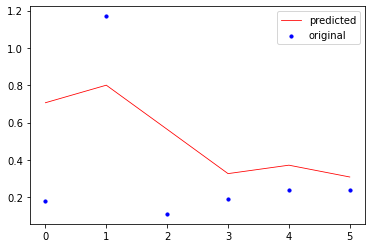

In [114]:
x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=10, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()


In [125]:
model_data = Data.drop(columns=["H", "H (lab.)","TOC[%]"])
test_row = model_data.iloc[[50,52]]
test_row

,DCAL,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,ILD,LL3,GG_Corr,GR,GRS_Corr,NPHICorr,POTA,THOR,URAN,RHOB
50,0.0479,0.0002,0.2195,0.0035,0.0002,0.7730,0.0036,218.9607,75.8438,6.8766,6.7501,147.9082,147.9053,124.9519,0.255398,4.5837,12.1684,2.6308,2.6642
52,0.0563,0.0002,0.2391,0.0037,0.0002,0.7498,0.0070,219.0267,76.5938,6.7899,6.6498,142.1514,143.6124,116.1281,0.253047,4.3884,11.1811,2.9730,2.6593


In [126]:
#quality check
test_rownet = np.asarray(test_row) #testrow to model data without H, Hlab and TOC
test_rownet = test_rownet.reshape(2,19,1)
testpred = model.predict(test_rownet)
print(testpred)

[[-0.3278769]
 [-0.446061 ]]


[[-0.3278769]
 [-0.446061 ]]


In [44]:
model.save('cnn1.h5')

In [114]:
print("")

In [33]:
print("")

In [115]:
print("")

In [32]:
print("")